## Import des packages 

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

from skimage.transform import resize

## Explorer le dataset

In [2]:
# Dictionnaire de correspondance entre les labels numériques et les noms d'objets

label_names = {
    0: 'Avion',
    1: 'Automobile',
    2: 'Oiseau',
    3: 'Chat',
    4: 'Cerf',
    5: 'Chien',
    6: 'Grenouille',
    7: 'Cheval',
    8: 'Bateau',
    9: 'Camion'
}

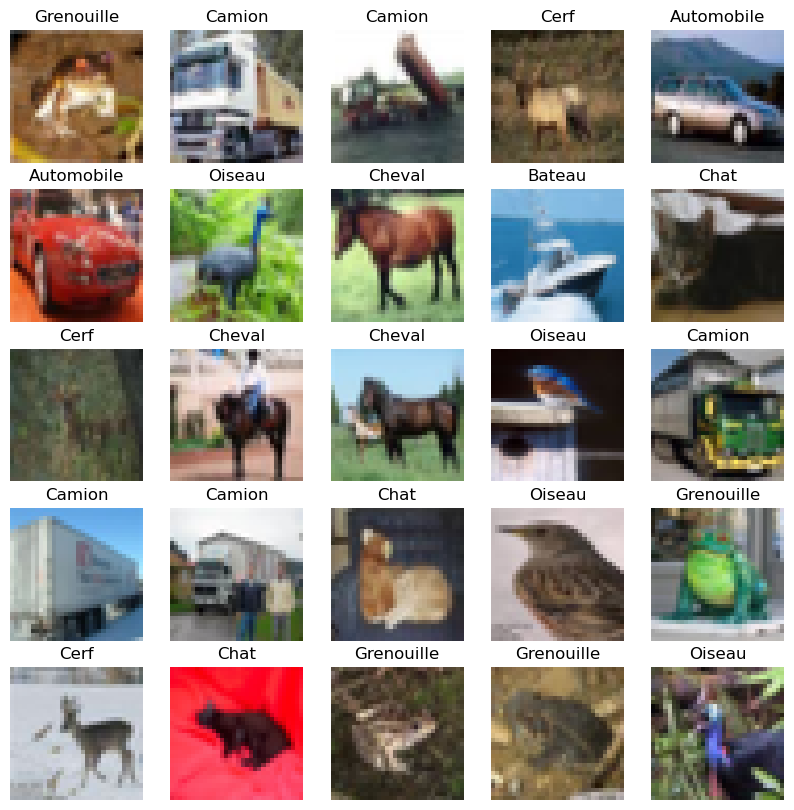

In [6]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

# Charger les données
batch1 = unpickle('cifar-10-batches-py/data_batch_1')
batch2 = unpickle('cifar-10-batches-py/data_batch_2')
batch3 = unpickle('cifar-10-batches-py/data_batch_3')
batch4 = unpickle('cifar-10-batches-py/data_batch_4')
batch5 = unpickle('cifar-10-batches-py/data_batch_5')

# Concaténer les batches
data = np.concatenate([batch1[b'data'], batch2[b'data'], batch3[b'data'], batch4[b'data'], batch5[b'data']])
labels = np.concatenate([batch1[b'labels'], batch2[b'labels'], batch3[b'labels'], batch4[b'labels'], batch5[b'labels']])

# Les étiquettes sont des entiers, vous pouvez mapper ces entiers à des noms de classe si vous avez une correspondance
# Afficher les images avec les noms des objets
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    img = data[i].reshape(3, 32, 32).transpose(1, 2, 0)  # Redimensionner les pixels pour obtenir une image de 32x32x3
    img = img.astype(np.uint8)  # Assurez-vous que les valeurs des pixels sont dans le bon intervalle (0-255) pour les couleurs RGB
    plt.imshow(img, interpolation='nearest')  # Utiliser 'nearest' pour éviter l'interpolation et le flou
    plt.axis('off')
    plt.title(label_names[labels[i]])  # Utiliser le dictionnaire de correspondance pour obtenir le nom de l'objet
plt.show()


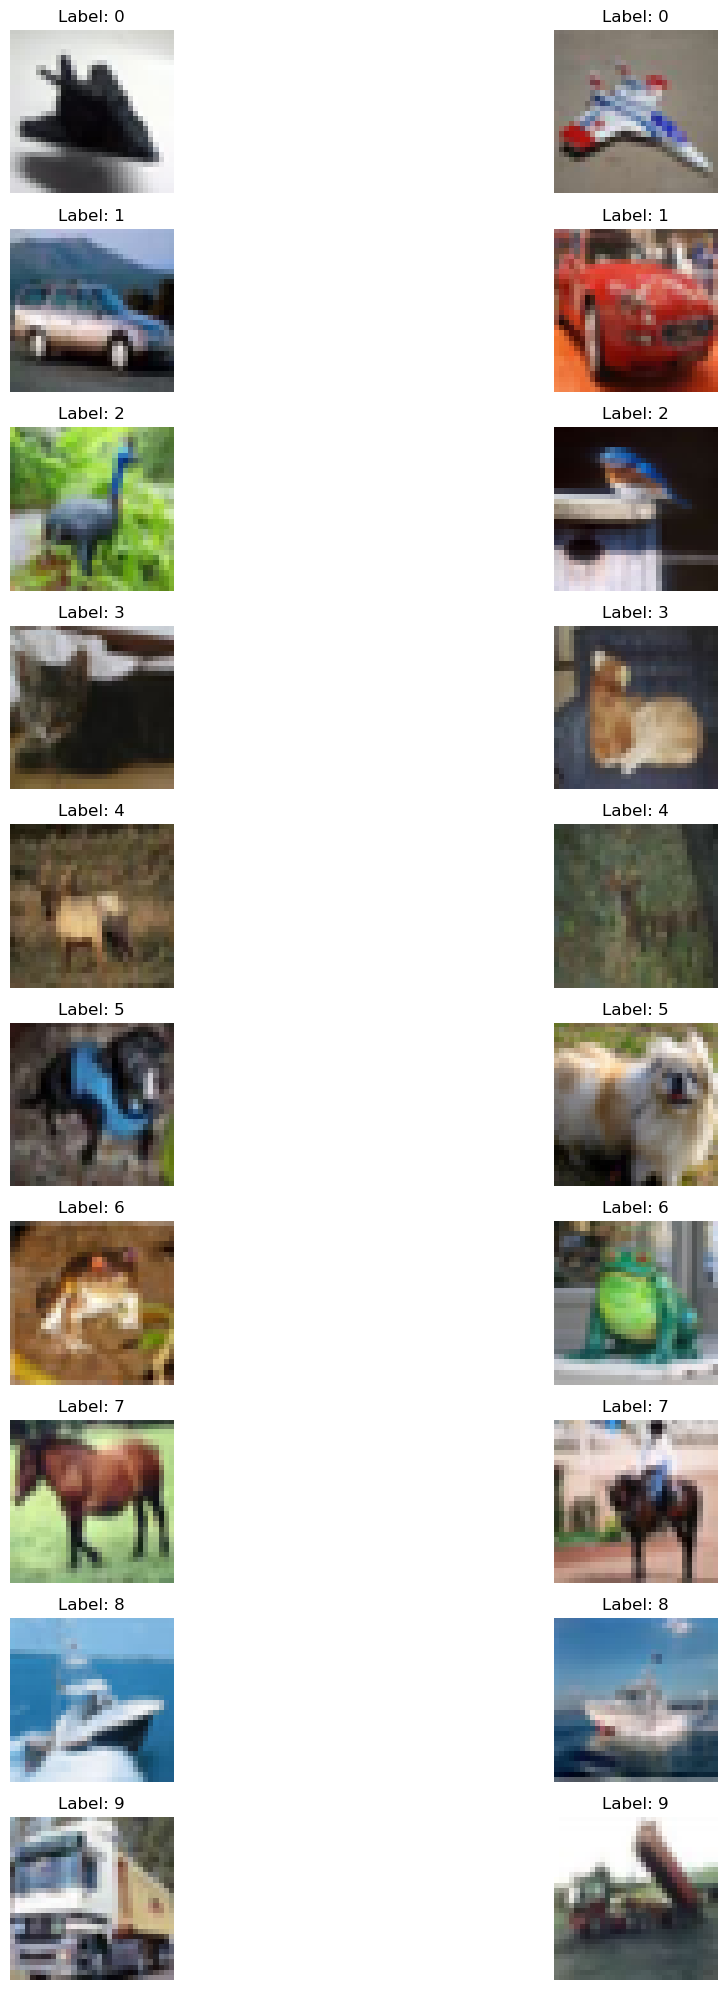

In [10]:
# Créer un dictionnaire pour regrouper les indices des images par label
label_indices = {label: [] for label in range(10)}

# Remplir le dictionnaire avec les indices des images pour chaque label
for i, label in enumerate(labels):
    label_indices[label].append(i)

# Afficher une ou deux images par type de label
plt.figure(figsize=(15, 20))
for label in range(10):
    indices = label_indices[label]
    # Afficher une ou deux images par label
    for i in range(min(len(indices), 2)):
        plt.subplot(10, 2, label*2 + i + 1)
        img = data[indices[i]].reshape(3, 32, 32).transpose(1, 2, 0)
        img = img.astype(np.uint8)
        plt.imshow(img, interpolation='nearest')
        plt.axis('off')
        plt.title(f'Label: {label}')
plt.tight_layout()
plt.show()

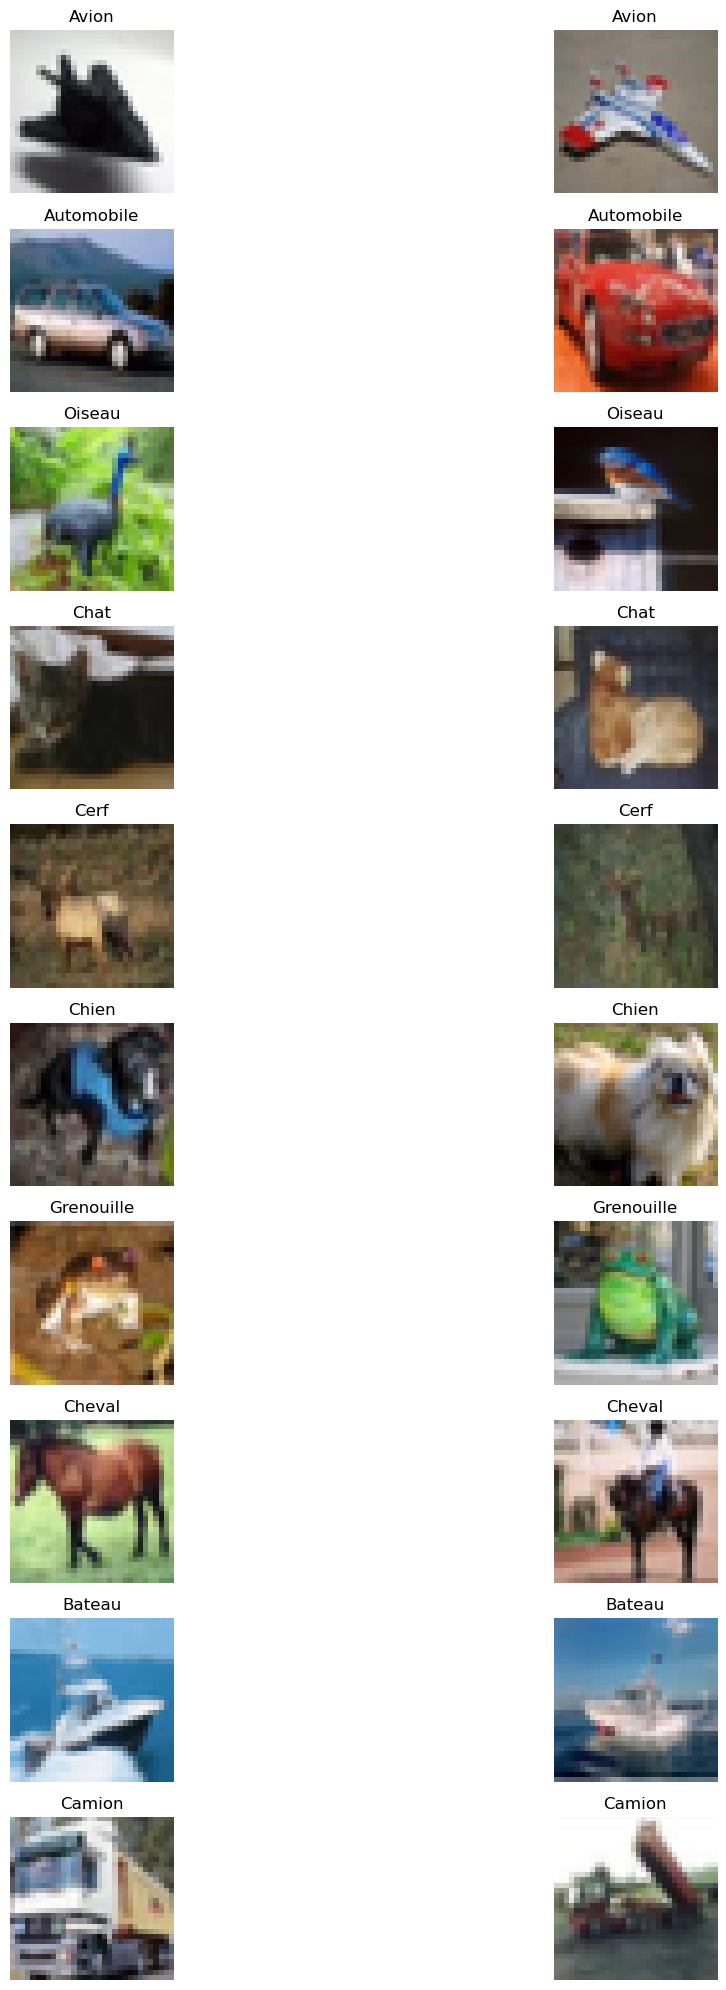

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Créer un dictionnaire pour regrouper les indices des images par label
label_indices = {label: [] for label in range(10)}

# Remplir le dictionnaire avec les indices des images pour chaque label
for i, label in enumerate(labels):
    label_indices[label].append(i)

# Afficher une ou deux images par type de label avec les noms correspondants
plt.figure(figsize=(15, 20))
for label in range(10):
    indices = label_indices[label]
    # Afficher une ou deux images par label
    for i in range(min(len(indices), 2)):
        plt.subplot(10, 2, label*2 + i + 1)
        img = data[indices[i]].reshape(3, 32, 32).transpose(1, 2, 0)
        img = img.astype(np.uint8)
        plt.imshow(img, interpolation='nearest')
        plt.axis('off')
        plt.title(label_names[label])
plt.tight_layout()
plt.show()

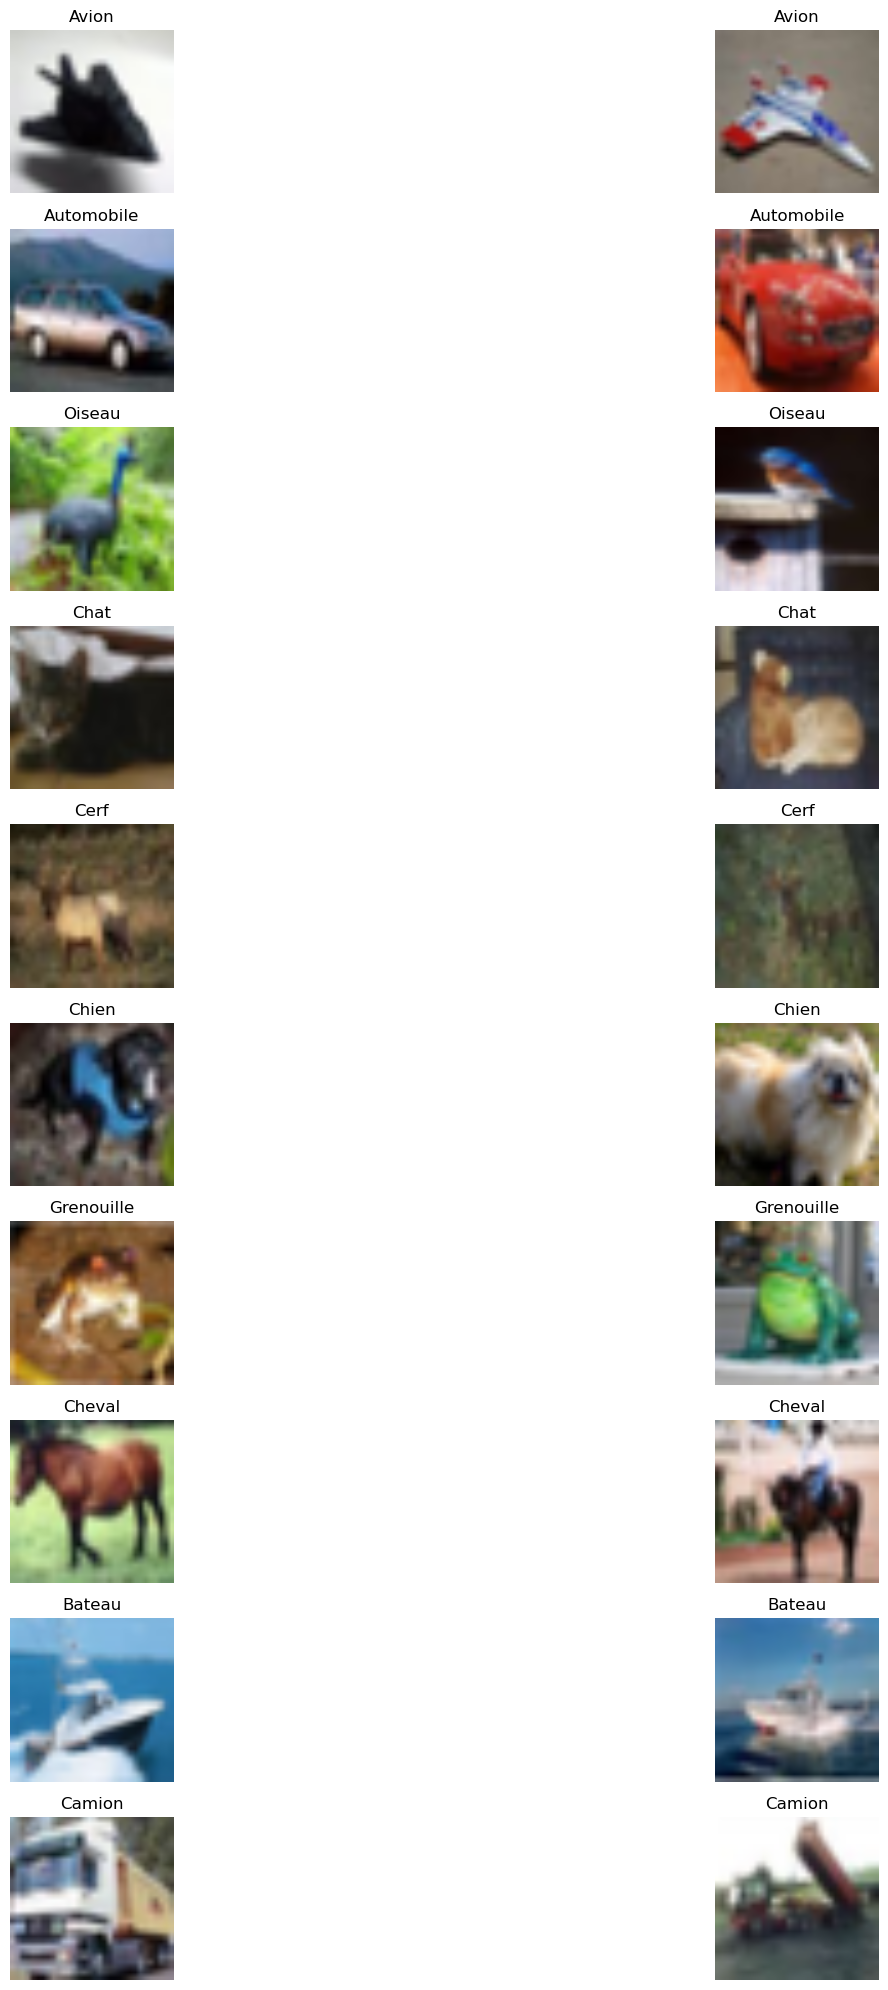

In [14]:
# Essayer d'améliorer la qualité de l'image 
plt.figure(figsize=(20, 20))  # Augmenter la taille de la figure

for label in range(10):
    indices = label_indices[label]
    for i in range(min(len(indices), 2)):
        plt.subplot(10, 2, label*2 + i + 1)
        img = data[indices[i]].reshape(3, 32, 32).transpose(1, 2, 0)
        img = img.astype(np.uint8)
        plt.imshow(img, interpolation='bilinear')  # Utiliser l'interpolation bilinéaire
        plt.axis('off')
        plt.title(label_names[label])  # Utiliser le dictionnaire de correspondance pour obtenir le nom de l'objet

plt.tight_layout()
plt.show()

## Identifier les contours des objets

In [15]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


### Pour une image internet simple

Fonctionne bien pour des images qui ne sont pas trop complexes

In [16]:
import cv2
import numpy as np

image = cv2.imread('img_avion.png')

# Convertir l'image en niveaux de gris
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Appliquer un flou gaussien pour réduire le bruit
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Appliquer l'algorithme de détection de contours de Canny
edges = cv2.Canny(blurred, 30, 150)

# Trouver les contours dans l'image
contours, _ = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Créer une copie de l'image originale pour afficher les contours
contour_image = image.copy()

# Dessiner les contours sur l'image copiée
cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)

# Afficher l'image originale et l'image avec les contours
cv2.imshow('Original', image)
cv2.imshow('Contours', contour_image)

# Permet de quitter en appuyant sur ESC en cliquant sur les images 
while True:
    key = cv2.waitKey(1) & 0xFF
    if key == 27:  # Touche ESC
        break

# Fermer toutes les fenêtres
cv2.destroyAllWindows()

### Pour une image issue de CIFAR-10

Fonctionne relativement bien, mais moins de précision car les images sont floues. Doit pouvoir encore être amélioré. 

Pour que ça fonctionne mieux, l'étape d'application d'un flou gaussien a été retirée, doit pouvoir encore améliorer en travaillant sur cette notion de flou 

In [17]:
import pickle
import numpy as np
import cv2

# Fonction pour charger les données CIFAR-10
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

# Charger les données du premier batch (batch_1)
batch_1 = unpickle('cifar-10-batches-py/data_batch_1')

# Extraire les images et les étiquettes du premier batch
data = batch_1[b'data']
labels = batch_1[b'labels']

# Récupérer l'indice de la première image d'avion dans le batch
index_avion = labels.index(0)

# Récupérer l'image d'avion
image_avion = data[index_avion].reshape(3, 32, 32).transpose(1, 2, 0)

# Convertir l'image en format OpenCV (BGR)
image_avion_bgr = cv2.cvtColor(image_avion, cv2.COLOR_RGB2BGR)

# Convertir l'image en niveaux de gris
gray = cv2.cvtColor(image_avion_bgr, cv2.COLOR_BGR2GRAY)

# Appliquer l'algorithme de détection de contours de Canny
edges = cv2.Canny(gray, 30, 150)

# Trouver les contours dans l'image
contours, _ = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Créer une copie de l'image originale pour afficher les contours
contour_image = image_avion_bgr.copy()

# Dessiner les contours sur l'image copiée
cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)

# Afficher l'image originale et l'image avec les contours
cv2.imshow('Original', image_avion_bgr)
cv2.imshow('Contours', contour_image)

# Attendre jusqu'à ce que la touche ESC soit pressée pour fermer les fenêtres
while True:
    key = cv2.waitKey(1) & 0xFF
    if key == 27:  # Touche ESC
        break

# Fermer toutes les fenêtres
cv2.destroyAllWindows() 

## Récupérer les coordonnées de l'objet 

### Pour une image internet simple

In [24]:
import cv2
import numpy as np

image = cv2.imread('img_avion.png')

# Convertir l'image en niveaux de gris
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Appliquer un flou gaussien pour réduire le bruit
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Appliquer l'algorithme de détection de contours de Canny
edges = cv2.Canny(blurred, 30, 150)

# Trouver les contours dans l'image
contours, _ = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

contour_data = []

for contour in contours:
    for point in contour:
        x, y = point[0] 
        print(f'Coordonnées du contour : ({x}, {y})')
        contour_data.append({'x': x, 'y': y})

Coordonnées du contour : (713, 127)
Coordonnées du contour : (712, 128)
Coordonnées du contour : (707, 128)
Coordonnées du contour : (706, 129)
Coordonnées du contour : (702, 129)
Coordonnées du contour : (701, 130)
Coordonnées du contour : (698, 130)
Coordonnées du contour : (697, 131)
Coordonnées du contour : (694, 131)
Coordonnées du contour : (693, 132)
Coordonnées du contour : (691, 132)
Coordonnées du contour : (690, 133)
Coordonnées du contour : (688, 133)
Coordonnées du contour : (687, 134)
Coordonnées du contour : (685, 134)
Coordonnées du contour : (684, 135)
Coordonnées du contour : (682, 135)
Coordonnées du contour : (681, 136)
Coordonnées du contour : (679, 136)
Coordonnées du contour : (678, 137)
Coordonnées du contour : (676, 137)
Coordonnées du contour : (675, 138)
Coordonnées du contour : (673, 138)
Coordonnées du contour : (672, 139)
Coordonnées du contour : (671, 139)
Coordonnées du contour : (670, 140)
Coordonnées du contour : (669, 140)
Coordonnées du contour : (66

In [25]:
import pandas as pd 

contour_df = pd.DataFrame(contour_data)

print(contour_df.head())

     x    y
0  713  127
1  712  128
2  707  128
3  706  129
4  702  129


### Pour une image de CIFAR-10 

In [26]:
import pickle
import numpy as np
import cv2
import pandas as pd

# Fonction pour charger les données CIFAR-10
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

# Charger les données du premier batch (batch_1)
batch_1 = unpickle('cifar-10-batches-py/data_batch_1')

# Extraire les images et les étiquettes du premier batch
data = batch_1[b'data']
labels = batch_1[b'labels']

# Récupérer l'indice de la première image d'avion dans le batch
index_avion = labels.index(0)

# Récupérer l'image d'avion
image_avion = data[index_avion].reshape(3, 32, 32).transpose(1, 2, 0)

# Convertir l'image en format OpenCV (BGR)
image_avion_bgr = cv2.cvtColor(image_avion, cv2.COLOR_RGB2BGR)

# Convertir l'image en niveaux de gris
gray = cv2.cvtColor(image_avion_bgr, cv2.COLOR_BGR2GRAY)

# Appliquer l'algorithme de détection de contours de Canny
edges = cv2.Canny(gray, 30, 150) 
# Les paramètres 30 et 150 correspondent à la sensibilité des paramètres de détection, ils peuvent être modifiés 

# Trouver les contours dans l'image
contours, _ = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Créer une liste pour stocker les coordonnées des contours
contour_data_cifar = []

# Récupérer les coordonnées des contours
for contour in contours:
    for point in contour:
        x, y = point[0]  # Coordonnées du point (x, y)
        contour_data_cifar.append({'x': x, 'y': y})
        print(f'Coordonnées du contour : ({x}, {y})')

Coordonnées du contour : (22, 28)
Coordonnées du contour : (22, 29)
Coordonnées du contour : (23, 30)
Coordonnées du contour : (23, 31)
Coordonnées du contour : (23, 30)
Coordonnées du contour : (22, 29)
Coordonnées du contour : (16, 26)
Coordonnées du contour : (17, 26)
Coordonnées du contour : (18, 27)
Coordonnées du contour : (20, 27)
Coordonnées du contour : (18, 27)
Coordonnées du contour : (17, 26)
Coordonnées du contour : (9, 5)
Coordonnées du contour : (9, 7)
Coordonnées du contour : (8, 8)
Coordonnées du contour : (7, 7)
Coordonnées du contour : (5, 7)
Coordonnées du contour : (5, 9)
Coordonnées du contour : (6, 10)
Coordonnées du contour : (7, 10)
Coordonnées du contour : (9, 12)
Coordonnées du contour : (9, 14)
Coordonnées du contour : (6, 17)
Coordonnées du contour : (2, 17)
Coordonnées du contour : (2, 21)
Coordonnées du contour : (5, 21)
Coordonnées du contour : (6, 22)
Coordonnées du contour : (9, 22)
Coordonnées du contour : (10, 23)
Coordonnées du contour : (9, 24)
Coo

In [27]:
# Créer un DataFrame pandas à partir des données des contours
contour_df_cifar = pd.DataFrame(contour_data)

# Afficher les premières lignes du DataFrame
print(contour_df_cifar.head())

     x    y
0  713  127
1  712  128
2  707  128
3  706  129
4  702  129


## Utilisation de Datamorph 

Lien vers le notebook : https://stefaniemolin.com/data-morph/stable/index.html

In [28]:
pip install data-morph-ai

  Obtaining dependency information for data-morph-ai from https://files.pythonhosted.org/packages/9a/4a/3da3109a373bcdd59cd80a74f2efab528649c459e2441b312f1f121024be/data_morph_ai-0.2.0-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.2/171.2 kB 1.2 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 1.6 MB/s eta 0:00:00 0:00:01
  Created wheel for pytweening: filename=pytweening-1.2.0-py3-none-any.whl size=8010 sha256=019e909c8cf40ea25e91b8d976d37ef08c072843edd51ae4b6423b3b2e55a4ec
  Stored in directory: /Users/clementlaure/Library/Caches/pip/wheels/db/81/dc/0d61a3c9614f288e057ab63924e2a49edbeed4ffc916dcda1e
Successfully built pytweening
Note: you may need to restart the kernel to use updated packages.


In [31]:
!data-morph --start-shape panda --target-shape star

Processing starter shape 'panda'
star pattern: 100%|####################| 100000/100000 [03:37<00:00, 459.80it/s]
